In [1]:
# Celda 1

# Línea 1: Importamos la librería Pandas para manipulación de datos
import pandas as pd  # pd es el alias común para pandas

# Línea 2: Importamos la librería NumPy (opcional, pero útil para ciertas operaciones numéricas)
import numpy as np  # np es el alias común para numpy

# Línea 3: Importamos la librería Matplotlib para visualización básica
import matplotlib.pyplot as plt  # plt es el alias común para matplotlib

# Línea 4: Importamos Seaborn para mejorar la apariencia de los gráficos
import seaborn as sns  # sns es el alias común para seaborn

# Línea 5: Esta línea permite que los gráficos se muestren dentro del Notebook
%matplotlib inline  

# Línea 6: Configuramos el estilo de los gráficos de Seaborn
sns.set_style("whitegrid")  

print("Librerías importadas correctamente.")


Librerías importadas correctamente.


In [2]:
# Celda 2

# Línea 1: Definimos la ruta al archivo CSV que contiene los datos de sensores
ruta_csv = r"C:\Users\Fabelec\Desktop\GZO\GZO_Trabajo\Analista_Programador\DataAnalyst\Projects\machine_sensor_data_analysis\data\sensor_data.csv"  

# Línea 2: Leemos el archivo CSV y lo cargamos en un DataFrame de pandas
df = pd.read_csv(ruta_csv)  # pd.read_csv lee archivos CSV y los convierte en DataFrame

# Línea 3: Mostramos las primeras 5 filas para verificar la estructura de los datos
df.head()  # head() muestra por defecto las primeras 5 filas


,time_stamp,temperature,pressure,vibration
0,2023-01-01 00:00:00,25.0,1010,0.50
1,2023-01-01 00:01:00,20.5,1002,0.01
2,2023-01-01 00:02:00,21.0,1004,0.02
3,2023-01-01 00:03:00,21.5,1006,0.03
4,2023-01-01 00:04:00,22.0,1008,0.04


In [3]:
# Celda 3

# Línea 1: Revisamos información general del DataFrame
df.info()  # Muestra columnas, tipo de datos, valores nulos, etc.

# Línea 2: Revisamos estadísticas descriptivas rápidas
df.describe()  # Muestra count, mean, std, min, max, percentiles


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_stamp   1440 non-null   object 
 1   temperature  1440 non-null   float64
 2   pressure     1440 non-null   int64  
 3   vibration    1440 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 45.1+ KB


,temperature,pressure,vibration
count,1440.000000,1440.000000,1440.000000
mean,25.916667,1011.201389,0.057500
std,3.518046,7.009454,0.076143
min,20.000000,1000.000000,0.000000
25%,23.000000,1006.000000,0.020000
50%,26.000000,1012.000000,0.050000
75%,29.000000,1018.000000,0.070000
max,34.000000,1030.000000,0.500000


In [4]:
# Celda 4

# Línea 1: Revisamos si hay valores nulos en el DataFrame
valores_nulos = df.isnull().sum()  # isnull() detecta valores nulos, sum() los cuenta por columna

print("Valores nulos por columna:")
print(valores_nulos)

# Línea 2: Aquí, como ejemplo, podríamos eliminar o imputar (rellenar) valores nulos
# Si queremos eliminar filas con valores nulos:
df = df.dropna()  # dropna() elimina las filas que tengan valores nulos

# Línea 3: Confirmamos que ya no existan valores nulos
print("Valores nulos por columna después de dropna():")
print(df.isnull().sum())


Valores nulos por columna:
time_stamp     0
temperature    0
pressure       0
vibration      0
dtype: int64
Valores nulos por columna después de dropna():
time_stamp     0
temperature    0
pressure       0
vibration      0
dtype: int64


In [5]:
# Celda 5

# Línea 1: Convertimos la columna 'time_stamp' a formato datetime
df['time_stamp'] = pd.to_datetime(df['time_stamp'])  # pd.to_datetime convierte strings a tipo fecha

# Línea 2: Establecemos esa columna como índice del DataFrame (útil para series de tiempo)
df.set_index('time_stamp', inplace=True)  # inplace=True modifica el DataFrame sin crear uno nuevo

# Línea 3: Confirmamos el cambio
df.head()  # Para verificar que ahora el índice es 'time_stamp'


,temperature,pressure,vibration
time_stamp,,,
2023-01-01 00:00:00,25.0,1010,0.50
2023-01-01 00:01:00,20.5,1002,0.01
2023-01-01 00:02:00,21.0,1004,0.02
2023-01-01 00:03:00,21.5,1006,0.03
2023-01-01 00:04:00,22.0,1008,0.04


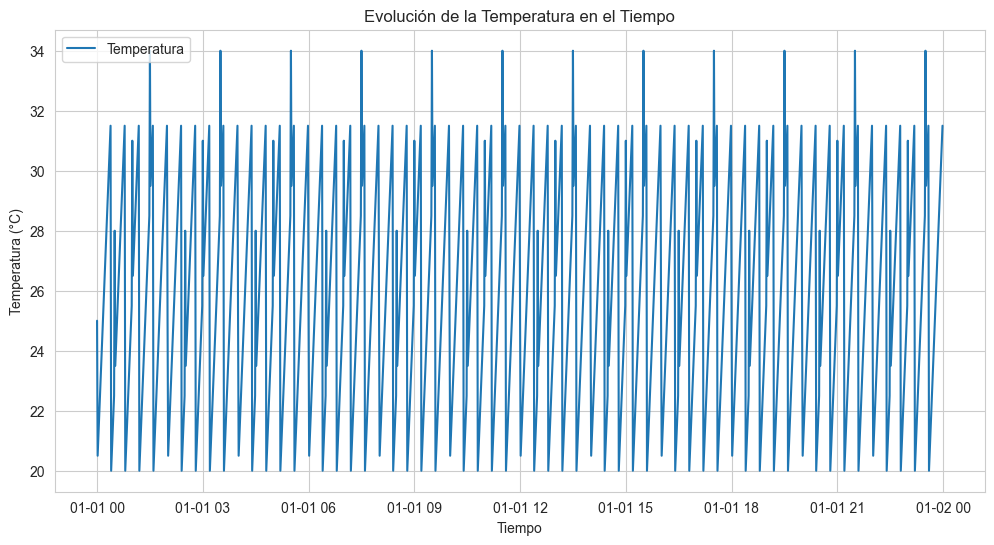

In [6]:
# Celda 6

# Línea 1: Configuramos el tamaño de la figura
plt.figure(figsize=(12,6))  # fig de 12 (ancho) x 6 (alto)

# Línea 2: Graficamos la columna 'temperature' en función del índice (tiempo)
plt.plot(df.index, df['temperature'], label='Temperatura')  # label es la etiqueta de la leyenda

# Línea 3: Agregamos título al gráfico
plt.title('Evolución de la Temperatura en el Tiempo')

# Línea 4: Etiquetamos el eje X
plt.xlabel('Tiempo')

# Línea 5: Etiquetamos el eje Y
plt.ylabel('Temperatura (°C)')

# Línea 6: Mostramos la leyenda
plt.legend()

# Línea 7: Mostramos el gráfico
plt.show()
